<a href="https://colab.research.google.com/github/joao2000/Trabalhos/blob/main/Campo_Potencial_El%C3%A9trico_de_Anel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código de: 

Lucas Kenzo Yuhara - RA:240022

João Augusto Dantas Camelo dos Santos - RA:237417

Miguel Cataldo Mendonça Leite - RA:185577

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import math

In [ ]:
#Parametros de entrada:

#Raio do anel
R=10
#Carga do anel
Q=2*pow(10,-6)
#Constante eletrostatica
K=9*pow(10,9)
#Densidade de carga ao longo do anel
lamb = Q/(2*np.pi*R)


In [ ]:
#Numero de discretizações na somatória das funções no R2:
N=100

#FUNÇÔES no R2:
#Distancia do ponto ao anel r(x,y,theta): theta em radianos
def dis(x,y,theta):
  return np.sqrt(pow(x,2)+pow(y-R*np.sin(theta),2)+pow(-R*np.cos(theta),2))
#Função Ex:
def Ex(x,y):
  #Somatoria discriminada
  soma = 0
  for i in range(0,N+1,1):
   # print("i=",i)
    soma = soma + pow(1/dis(x,y,i*(2*np.pi/N)),3)
    #print("soma=",soma)
    #print("Angulo =",i*(2*math.pi/N))
  return x*K*R*lamb*(2*np.pi/N)*soma

#Função Ey:
def Ey(x,y):
  #Somatoria discriminada
  soma = 0
  for i in range(0,N+1,1):
    soma = soma + (y-R*np.sin(i*(2*math.pi/N)))*pow(1/dis(x,y,i*(2*math.pi/N)),3)
    # print("i=",i)
    # print("ry =",(y-R*math.sin(i*(2*math.pi/N))))
    # print("soma=",soma)
    # print("Angulo =",i*(2*math.pi/N))
  return K*R*lamb*2*math.pi/N*soma

#Função de validação:
def VEx(x):
  return (K*Q*x)/pow(x**2+R**2,3/2)

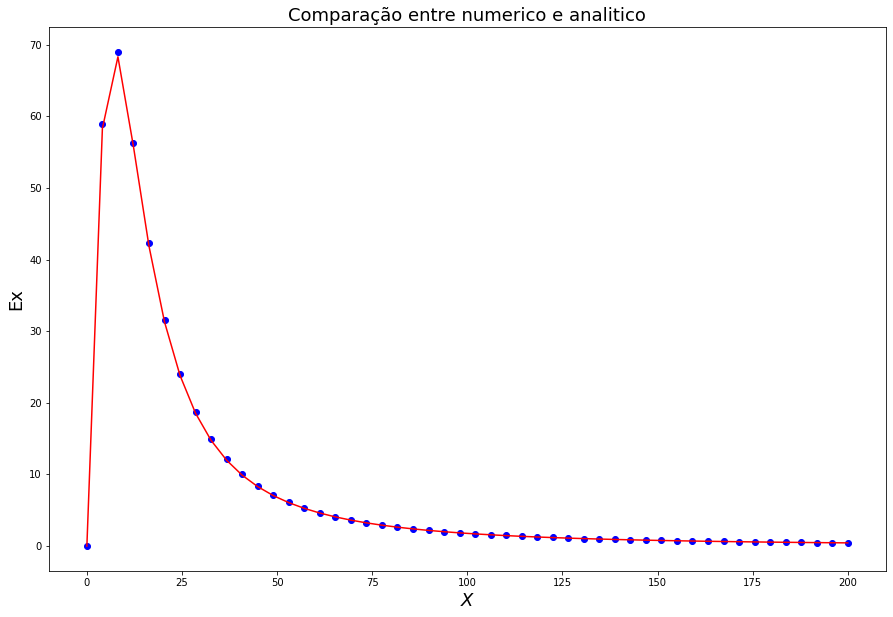

In [ ]:
#Validação das formulas
Nx=50
x_f=200
x = np.linspace(0,x_f,Nx)
y = np.linspace(0,x_f,Nx)
#Grade relação de todos os posiveis valores de x e y:
X, Y = np.meshgrid(x,y)

#Função usada:
a = Ex(x,0)
#Função valida:
b = VEx(x)

#Plotagem:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Comparação entre numerico e analitico',fontsize=18) 
plt.plot(x,a,'ob')
plt.plot(x,b,'-r')
ax.set_xlabel('$X$',fontsize=18)
ax.set_ylabel('Ex',fontsize=18)

plt.show()

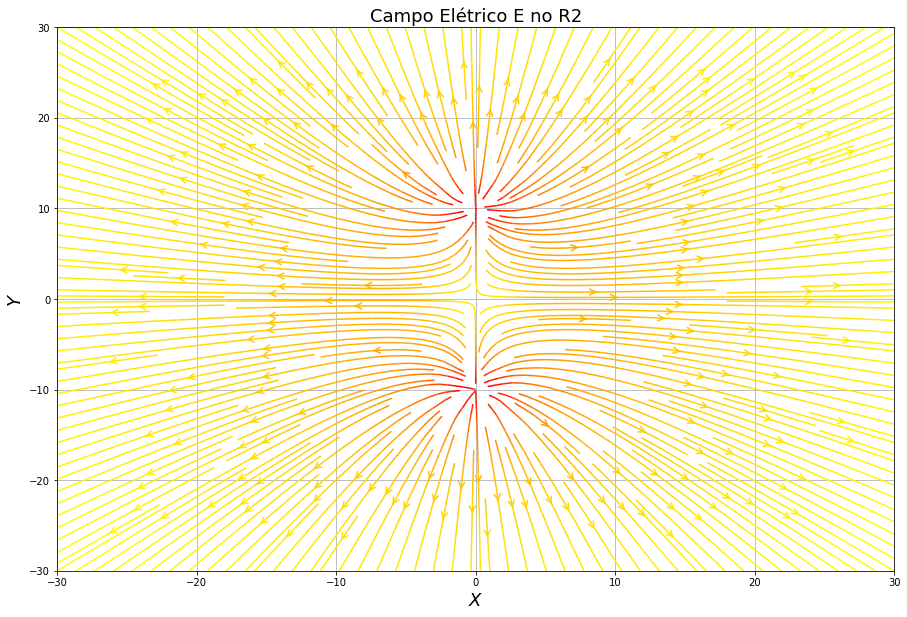

In [ ]:
#Grade com os valores de x e y:
x_f=3*R
y_f=3*R
#Numero de discretizações da malha
Nx=30


x = np.linspace(-x_f,x_f,Nx)
y = np.linspace(-y_f,y_f,Nx)
#Grade relação de todos os posiveis valores de x e y:
X, Y = np.meshgrid(x,y)

#Componentes xy do campo E:
a = Ex(X,Y)
b = Ey(X,Y)
#Módulo vetorial do campo E:
U = np.sqrt(pow(a,2)+pow(b,2))

#Plotagem dos valores do campo:
fig, ax = plt.subplots(figsize=(15, 10))

plt.title('Campo Elétrico E no R2',fontsize=18) 
plt.grid()
plt.streamplot(x,y,a,b,density=3, linewidth=None,color=-U**(0.5),  cmap='autumn', arrowstyle='->', arrowsize=1.5) 
#plt.colorbar()
ax.set_xlabel('$X$',fontsize=18)
ax.set_ylabel('$Y$',fontsize=18)
plt.show() 

In [ ]:
# Plot R3:

#Numero de discretizações das funções no R3:
N=30

#FUNÇÔES no R3:
def dis3(x,y,z,theta):
  return np.sqrt(pow(x,2)+pow(y-R*np.sin(theta),2)+pow(z-R*np.cos(theta),2))
#Função Ex:
def E3x(x,y,z):
  #Somatoria discriminada
  soma = 0
  for i in range(0,N+1,1):
   # print("i=",i)
    soma = soma + pow(1/dis3(x,y,z,i*(2*np.pi/N)),3)
    #print("soma=",soma)
    #print("Angulo =",i*(2*math.pi/N))
  return x*K*R*lamb*(2*np.pi/N)*soma

#Função Ey:
def E3y(x,y,z):
  #Somatoria discriminada
  soma = 0
  for i in range(0,N+1,1):
    soma = soma + (y-R*np.sin(i*(2*math.pi/N)))*pow(1/dis3(x,y,z,i*(2*math.pi/N)),3)
    # print("i=",i)
    # print("ry =",(y-R*math.sin(i*(2*math.pi/N))))
    # print("soma=",soma)
    # print("Angulo =",i*(2*math.pi/N))
  return K*R*lamb*2*math.pi/N*soma

#Função Ez:
def E3z(x,y,z):
  #Somatoria discriminada
  soma = 0
  for i in range(0,N+1,1):
    soma = soma + (z-R*np.cos(i*(2*math.pi/N)))*pow(1/dis3(x,y,z,i*(2*math.pi/N)),3)
    # print("i=",i)
    # print("ry =",(y-R*math.sin(i*(2*math.pi/N))))
    # print("soma=",soma)
    # print("Angulo =",i*(2*math.pi/N))
  return K*R*lamb*2*math.pi/N*soma

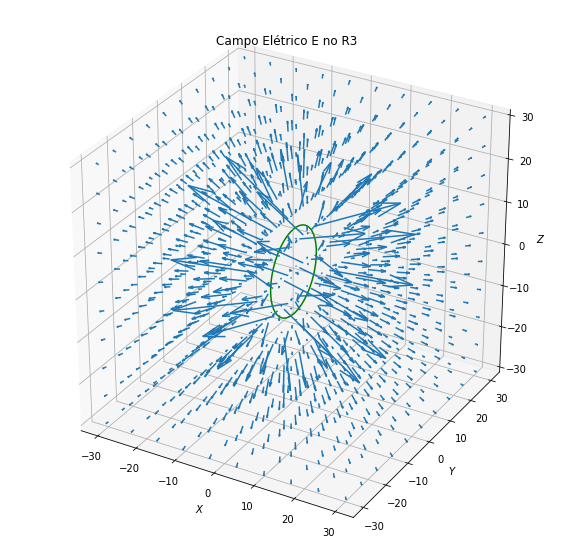

In [ ]:
#Limite dos valores:
v_f=3*R
#Numero de discretizações da malha
Nv=10

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(-v_f,v_f,Nv)
y = np.linspace(-v_f,v_f,Nv)
z = np.linspace(-v_f,v_f,Nv)
#Grade relação de todos os posiveis valores de x, y e z:
X, Y, Z = np.meshgrid(x,y,z)

#Componentes xyz do campo E:
a = E3x(X,Y,Z)
b = E3y(X,Y,Z)
c = E3z(X,Y,Z)
#Módulo vetorial do campo E:
U = (pow(a,2)+pow(b,2)+pow(c,2))

#Plotagem dos valores do campo:
#ax.figure(figsize=(15, 10)) 
fig.set_size_inches(10, 10)
plt.grid()
ax.quiver(X, Y, Z, a, b, c, length=0.1, )
#plt.streamplot(x,y,a,b,density=3, linewidth=None,color=U**(0.5),  cmap='autumn', arrowstyle='->', arrowsize=1.5) 
#plt.colorbar()

#Anel de raio R, com n pontos:
n = 100
xo = np.zeros(n)
yo =np.zeros(n)
zo =np.zeros(n)

for a in range(0, n):
  yo[a] = R*np.sin(a*2*np.pi/n)
  zo[a] = R*np.cos(a*2*np.pi/n)
ax.plot3D(xo,yo,zo,color="g")

ax.set_title("Campo Elétrico E no R3")
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$Z$")
#ax.view_init(0, 0)
plt.show() 

In [ ]:
#Função do potencial do anel:
#Numero de discretizações na somatória do potencial:
N_V = 100
#Usando: V = K*q/r
def V(x,y,z):
  #Somatoria discriminada
  soma = 0
  for i in range(1,N_V+1,1):
    soma = soma + 1/dis3(x,y,z,i*(2*math.pi/N_V))
  return K*R*lamb*2*(np.pi/N_V)*soma

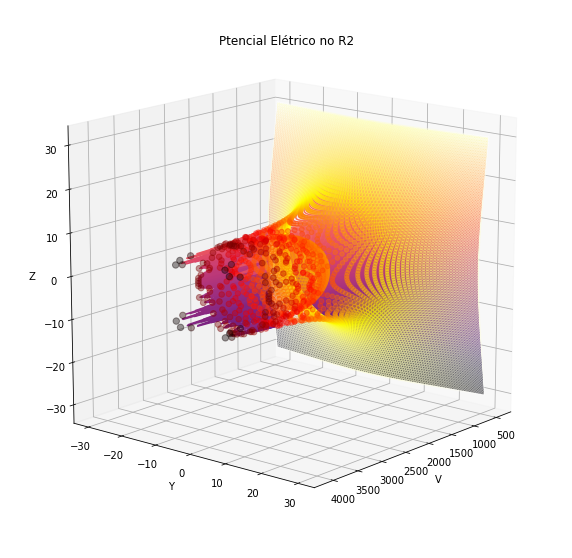

In [ ]:
#No R2 com o eixo X representando o potencial:
v_f = 3*R
Nv = 100
#x = V(0,y,z)
y = np.linspace(-v_f,v_f,Nv)
z = np.linspace(-v_f,v_f,Nv)

#Grade relação de todos os posiveis valores de x e y:
Y, Z = np.meshgrid(y,z)
X=V(0,Y,Z)
color = -X

#Plotagem:
fig=plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection = '3d')
ax.contour3D(X,Y,Z,500,cmap='magma')
ax.scatter3D(X, Y, Z, s=(X/100), c=color, cmap='hot', alpha=0.4)

ax.set_title("Ptencial Elétrico no R2")
ax.set_xlabel('V')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 40)

plt.show()


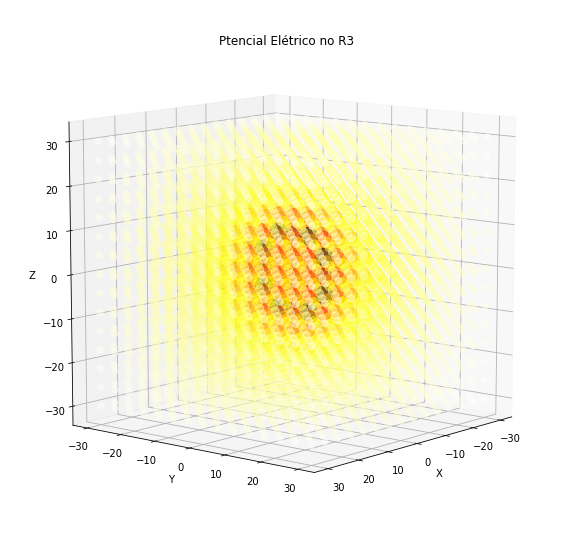

In [ ]:
#No R3:
v_f = 3*R
Nv = 15

x = np.linspace(-v_f,v_f,Nv)
y = np.linspace(-v_f,v_f,Nv)
z = np.linspace(-v_f,v_f,Nv)

#Grade relação de todos os posiveis valores de x e y:
X, Y, Z = np.meshgrid(x,y,z)
W = V(X,Y,Z)

#Plotagem:
# fig=plt.figure()
# fig.set_size_inches(10, 10)
# ax = plt.axes(projection = '3d')
color = W
fig=plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection = '3d')
#curva de nivel:
#ax.scatter3D(X, Y, Z, s=(X/100), c=color, cmap='hot')
#ax.contour3D(X,Y,Z,500,cmap='magma')
ax.scatter3D(X,Y,Z, s=(W/10), c=-W,cmap='hot', alpha = 0.5)

ax.set_title("Ptencial Elétrico no R3")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10, 40)
plt.show()